Adam = ADAptive Moment Estimation

Adam - адаптивная оценка момента. Используются две переменные скользящего среднего:

$v$ – первый момент
$s$ – второй момент
Алгоритм вычисляет экспоненциально взвешенное среднее прошлых градиентов и их квадратов градиентов. Эти скользящие средние затем используются для обновления параметров модели.

Алгоритм Адама состоит из следующих шагов:

Инициализация переменных. Алгоритм начинается с инициализации переменных скользящего среднего $v$ и $s$ - словарей для хранения экспоненциально взвешенных средних градиентов и квадратов градиентов соответственно.

Вычисление скользящих средних. Для каждого параметра модели алгоритм вычисляет скользящее среднее градиентов путем объединения текущего градиента с предыдущим скользящим средним. Также вычисляется скользящее среднее квадратов градиентов.
Коррекция смещения. Чтобы уменьшить смещение во время начальных итераций, Adam выполняет коррекцию смещения путем деления скользящих средних на поправочный коэффициент.
Обновление параметров. Алгоритм обновляет параметры модели, используя скользящие средние градиентов и квадраты градиентов.

\begin{aligned} s_t &= \beta_1 s_{t-1} + \left(1 – \beta_1 \right ) \nabla w_t \\v_t &= \beta_2 v_{t-1} + \left(1 – \beta_2 \right ) \left(\nabla w_t \right )^2 \\\hat{s_t} &= \frac{s_t}{1 – {\beta_1}^t}\\ \hat{v_t} &= \frac{v_t}{1 – {\beta_2}^t}\\ w_{t + 1} &= w_t – \frac{\alpha\hat{s_t}}{\sqrt{\hat{v_t} + \epsilon}}  \end{aligned}

$w_t$ - веса модели;

learning_rate ($\alpha$) - скорость обучения;

$\beta_1, \beta_2$ - скорости затухания для первого и второго моментов соответственно;

$s$ - оценка первого момента (среднее) градиентов;

$v$ - оценка второго момента (нецентрированная дисперсия) градиентов;

$t$ - текущая итерация;

$\epsilon$ - маленькое число, чтобы избежать деления на 0.

Минимум найден:
f([-1.63958683e-23  6.30142313e-23]) = 0.000000


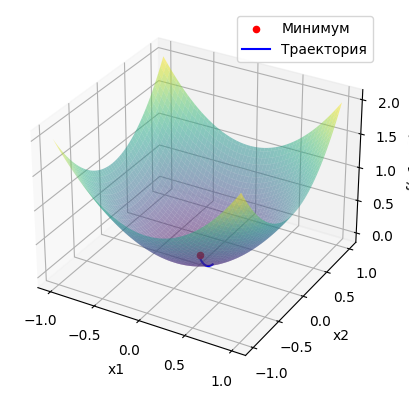

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# целевая функция
def objective(x1, x2):
    return x1**2 + x2**2

# градиент целевой функции
def gradient(x1, x2):
    return np.array([2*x1, 2*x2])

# инициализация моментов
def init_adam():
    s = np.zeros(2)
    v = np.zeros(2)
    return s, v

# шаг Adam - пересчет параметров
def adam_update_weights(x, grad, s, v, iteration, learning_rate, beta1, beta2, epsylon = 1e-8):
    s = beta1*s + (1 - beta1)*grad
    v = beta2*v + (1 - beta2)*(grad**2)
    s_hat = s / (1 - beta1**(iteration + 1))
    v_hat = v / (1 - beta2**(iteration + 1))
    x -= learning_rate * s_hat / np.sqrt(v_hat + epsylon)
    return x, s, v

# алгоритм Adam
def adam(objective, grad, bounds, max_iter, learning_rate, beta1, beta2, epsylon = 1e-8):
    # начальная точка
    x = bounds[:, 0] + np.random.rand(len(bounds))*(bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])
    scores, trajectory = [], []
    # инициализация моментов
    s, v = init_adam()

    # градиентный спуск Adam
    for _ in range(max_iter):
        # вычисление градиента
        grad = gradient(x[0], x[1])

        # пересчет параметров
        x, s, v = adam_update_weights(x, grad, s, v, _, learning_rate, beta1, beta2, epsylon)

        # вычисление целевой функции
        score = objective(x[0], x[1])
        scores.append(score)
        trajectory.append(x.copy())


    return x, scores, trajectory

np.random.seed(123)

# определение границ
bounds = np.array([[-1.0, 1.0], [-1.0, 1.0]])

max_iter = 500
learning_rate = 0.01
beta1 = 0.8
beta2 = 0.999

# Градиентный спуск Adam
x_min, scores, trajectory = adam(objective, gradient, bounds, max_iter, learning_rate, beta1, beta2)
print("Минимум найден:")
print("f(%s) = %f" % (x_min, scores[-1]))

# визуализация
x = np.linspace(bounds[0, 0], bounds[0, 1], 100)
y = np.linspace(bounds[1, 0], bounds[1, 1], 100)
X, Y = np.meshgrid(x, y)
Z = objective(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.plot_surface(X, Y, Z, cmap = 'viridis', alpha = 0.5)
ax.scatter(x_min[0], x_min[1], objective(x_min[0], x_min[1]), color = 'red', label = "Минимум")
ax.plot([point[0] for point in trajectory], [point[1] for point in trajectory], scores, color = "blue", label = "Траектория")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1, x2)")
ax.legend()
fig.show()


Задание


Модифицировать класс градиентного спуска для линейной регрессии с использованием алгоритма Adam.
Сравнить скорость обучения и качество модели для набора данных videogames.

In [2]:
import pandas as pd

## Старые метрики (обычный градиентный спуск на отшкалированных данных)

In [3]:
df = pd.read_csv(r'/content/Video Games.csv', index_col = "id")
df.sample(5) # выводим рандомные пять строк из датафрейма

,platform,year,genre,publisher,na_sales,eu_sales,other_sales,jp_sales
id,,,,,,,,
3646,PS3,2015,Role-Playing,Namco Bandai Games,0.00,0.00,0.00,1.10
2070,PS2,2008,Role-Playing,Banpresto,0.00,0.00,0.00,1.13
583,GC,2002,Misc,Infogrames,1.47,0.48,0.06,1.05
1074,PSP,2010,Misc,CyberFront,0.01,0.00,0.00,1.02
2895,Wii,2011,Action,Capcom,0.00,0.00,0.00,1.13


In [4]:
columns = ['na_sales', 'eu_sales', 'other_sales', 'jp_sales']
for column in columns:
  #df = df[ df[column] > df[column].quantile(0.25) ]
  df = df[df[column] < df[column].max() - df[column].std() ]

In [57]:
def OHE(df, column):
  new_df = df.copy()
  unique_values = df[column].unique()
  #unique_values = unique_values[:-1]
  for value in unique_values:
    new_column_name = f"{column}_{value}"
    new_df[new_column_name] = (df[column] == value).astype(int)
  new_df = new_df.drop(columns=column)
  return new_df


In [58]:
feature_df = OHE(df, 'publisher')
feature_df = OHE(feature_df, 'genre')
feature_df = feature_df.drop('platform', axis=1)
feature_df

<ipython-input-57-06470ff4df28>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[new_column_name] = (df[column] == value).astype(int)
<ipython-input-57-06470ff4df28>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[new_column_name] = (df[column] == value).astype(int)
<ipython-input-57-06470ff4df28>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. 

,year,na_sales,eu_sales,other_sales,jp_sales,publisher_Electronic Arts,publisher_ASCII Entertainment,publisher_Takara Tomy,publisher_Namco Bandai Games,publisher_Sega,...,genre_Sports,genre_Fighting,genre_Action,genre_Adventure,genre_Strategy,genre_Misc,genre_Simulation,genre_Platform,genre_Puzzle,genre_Shooter
id,,,,,,,,,,,,,,,,,,,,,
2830,2012,0.38,0.52,0.25,1.01,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3865,1996,0.00,0.00,0.00,1.31,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4617,2009,0.09,0.00,0.01,1.04,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3675,2007,0.00,0.00,0.00,1.08,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1612,2016,0.00,0.00,0.00,1.12,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,2010,0.00,0.00,0.00,1.09,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5720,2007,3.06,1.18,0.46,1.29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4579,2015,0.00,0.00,0.00,1.06,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [60]:
y = np.array (feature_df['jp_sales']).reshape(-1, 1)
x = feature_df.drop('jp_sales', axis = 1)

In [61]:
class MultipleRegression():

    def __init__(self, in_features):
        self.a1 = np.zeros((in_features, 1))

    def predict(self, x):
        return np.array(x @ self.a1)

    def grad(self, x, y):
      #return np.array(2*(self.predict(x) - y) / y.shape[0])
      return np.array(2*x.T @ (x @ self.a1 - y) / len(y))

    def MSE(self, x, y):
        return ((y - self.predict(x))**2).mean().item()

    def MAE(self, x, y):
        return abs(y - self.predict(x)).mean()

    def MAPE(self, x, y):
        return abs((y - self.predict(x)) / y).mean()

    def fit(self, x, Y, alpha = 0.001, epsylon = 0.0001, max_steps = 5000):
        steps, errors = [], []
        step = 0
        prev_error = np.inf
        for _ in range(max_steps):

            self.a1 -= alpha* self.grad(x, Y)
            new_error = self.MSE(x, Y)
            errors.append(new_error)
            steps.append(step)
            step += 1
            if abs(prev_error - new_error) < epsylon:
                break
            prev_error  = new_error
        return steps, errors

In [62]:
class minMaxScaler():
  def __init__(self):
    self.max = 0
    self.min = 0

  def fit(self, x):
    self.max = x.max()
    self.min = x.min()

  def transform(self, x):
    return (x - self.min) / (self.max - self.min)

  def fit_transform(self, x):
    self.fit(x)
    return self.transform(x)


In [63]:
class standardScaler():

  def __init__(self):
    self.mean = 0
    self.std = 0

  def fit(self, x):
    self.mean = x.mean()
    self.std = x.std()

  def transform(self, x):
    return (x  - self.mean) / (self.std ) #*((x.shape[0]-1)**0.5))

  def fit_transform(self, x):
    self.fit(x)
    return self.transform(x)

In [64]:
stand = standardScaler()
stand.fit_transform(x.year).describe() # всё отлично работает

count    4.254000e+03
mean     6.026418e-15
std      1.000000e+00
min     -3.546459e+00
25%     -5.383366e-01
50%      2.136941e-01
75%      6.649125e-01
max      1.567349e+00
Name: year, dtype: float64

In [12]:
scale = minMaxScaler()
scale.fit_transform(x.year)

id
2830    0.852941
3865    0.382353
4617    0.764706
3675    0.705882
1612    0.970588
          ...   
3996    0.794118
5720    0.705882
4579    0.941176
4072    0.382353
5883    0.264706
Name: year, Length: 4254, dtype: float64

In [65]:
minmax = minMaxScaler()
standard = standardScaler()

In [66]:
x_scaled  = x.copy()
x_standard = x.copy()

columns = ['year', 'na_sales', 'eu_sales', 'other_sales']
for column in columns:
  x_scaled[column] = minmax.fit_transform(np.array(x_scaled[column]).reshape((-1, 1)))
  x_standard[column] = standard.fit_transform(np.array(x_standard[column]).reshape((-1, 1)))

In [67]:
x_scaled

,year,na_sales,eu_sales,other_sales,publisher_Electronic Arts,publisher_ASCII Entertainment,publisher_Takara Tomy,publisher_Namco Bandai Games,publisher_Sega,publisher_Capcom,...,genre_Sports,genre_Fighting,genre_Action,genre_Adventure,genre_Strategy,genre_Misc,genre_Simulation,genre_Platform,genre_Puzzle,genre_Shooter
id,,,,,,,,,,,,,,,,,,,,,
2830,0.852941,0.014111,0.047230,0.084459,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3865,0.382353,0.000000,0.000000,0.000000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4617,0.764706,0.003342,0.000000,0.003378,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3675,0.705882,0.000000,0.000000,0.000000,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1612,0.970588,0.000000,0.000000,0.000000,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,0.794118,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5720,0.705882,0.113628,0.107175,0.155405,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4579,0.941176,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [68]:
x_standard

,year,na_sales,eu_sales,other_sales,publisher_Electronic Arts,publisher_ASCII Entertainment,publisher_Takara Tomy,publisher_Namco Bandai Games,publisher_Sega,publisher_Capcom,...,genre_Sports,genre_Fighting,genre_Action,genre_Adventure,genre_Strategy,genre_Misc,genre_Simulation,genre_Platform,genre_Puzzle,genre_Shooter
id,,,,,,,,,,,,,,,,,,,,,
2830,0.815414,0.021865,0.453825,0.854788,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3865,-1.591366,-0.320830,-0.331009,-0.326831,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4617,0.364143,-0.239665,-0.331009,-0.279567,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3675,0.063295,-0.320830,-0.331009,-0.326831,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1612,1.417110,-0.320830,-0.331009,-0.326831,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,0.514567,-0.320830,-0.331009,-0.326831,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5720,0.063295,2.438768,1.449960,1.847349,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4579,1.266686,-0.320830,-0.331009,-0.326831,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_scaled = np.array(x_scaled)
x_standard = np.array(x_standard)

In [71]:
x_scaled_train,  x_scaled_test, y_sc_train,y_sc_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [72]:
x_standard_train, x_standard_test, y_st_train, y_st_test = train_test_split(x_standard, y, test_size=0.2, random_state=42)

In [73]:
model = MultipleRegression(x_scaled_train.shape[1])
steps, errors = model.fit(x_scaled_train, y_sc_train)

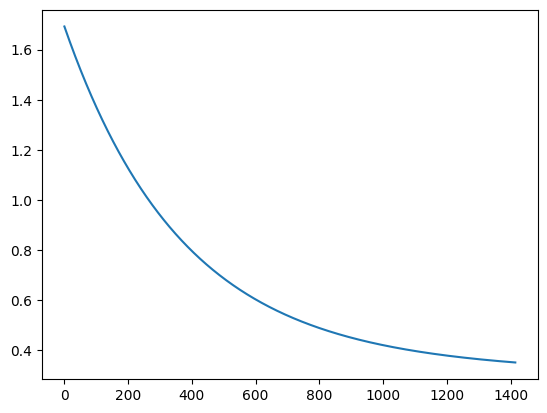

In [74]:
plt.plot(steps, errors)

In [75]:
print(f'Результаты на тестовой: mse - {round(model.MSE(x_scaled_test, y_sc_test), 3)} ,mape -  {round(model.MAPE(x_scaled_test, y_sc_test), 3)}\nРезультаты на тренировочной:mse - {round(model.MSE(x_scaled_train, y_sc_train), 3)} ,mape -  {round(model.MAPE(x_scaled_train, y_sc_train), 3)}')

Результаты на тестовой: mse - 0.305 ,mape -  0.221
Результаты на тренировочной:mse - 0.351 ,mape -  0.217


In [76]:
model = MultipleRegression(x_standard_train.shape[1])
steps, errors = model.fit(x_standard_train, y_st_train)

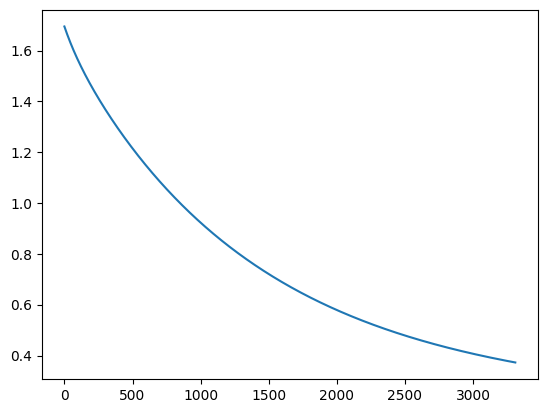

In [77]:
plt.plot(steps, errors)

In [78]:
print(f'Результаты на тестовой: mse - {round(model.MSE(x_standard_test, y_st_test), 3)} ,mape -  {round(model.MAPE(x_standard_test, y_st_test), 3)}\nРезультаты на тренировочной:mse - {round(model.MSE(x_standard_train, y_st_train), 3)} ,mape -  {round(model.MAPE(x_standard_train, y_st_train), 3)}')

Результаты на тестовой: mse - 0.322 ,mape -  0.381
Результаты на тренировочной:mse - 0.373 ,mape -  0.387


## С использованием Adam

In [94]:
class MultipleRegressionAdam():

    def __init__(self, in_features):
        self.a1 = np.zeros((in_features, 1))
        self.beta1 = 0.8
        self.beta2 = 0.999
        self.s = np.zeros((in_features, 1))
        self.v = np.zeros((in_features, 1))

    def predict(self, x):
        return np.array(x @ self.a1)

    def grad(self, x, y):
      #return np.array(2*(self.predict(x) - y) / y.shape[0])
      return np.array(2*x.T @ (x @ self.a1 - y) / len(y))

    def MSE(self, x, y):
        return ((y - self.predict(x))**2).mean().item()

    def MAE(self, x, y):
        return abs(y - self.predict(x)).mean()

    def MAPE(self, x, y):
        return abs((y - self.predict(x)) / y).mean()

    def fit(self, x, Y, alpha = 0.001, epsylon = 1e-8, max_steps = 5000, tolerance = 1e-4):
        steps, errors = [], []
        step = 0
        prev_error = np.inf
        for _ in range(max_steps):
            grad = self.grad(x, Y)
            self.s = self.beta1*self.s + (1 - self.beta1)*grad
            self.v = self.beta2*self.v + (1 - self.beta2)*(grad**2)
            s_hat = self.s / (1 - self.beta1**(_ + 1))
            v_hat = self.v / (1 - self.beta2**(_ + 1))
            self.a1 -= alpha*s_hat / np.sqrt(v_hat + epsylon)
            new_error = self.MSE(x, Y)
            errors.append(new_error)
            steps.append(step)
            step += 1
            if abs(prev_error - new_error) < tolerance:
                print('Convergence')
                break
            prev_error  = new_error
        return steps, errors

In [95]:
model = MultipleRegressionAdam(x_scaled_train.shape[1])
steps, errors = model.fit(x_scaled_train, y_sc_train, max_steps = 10000)

Convergence


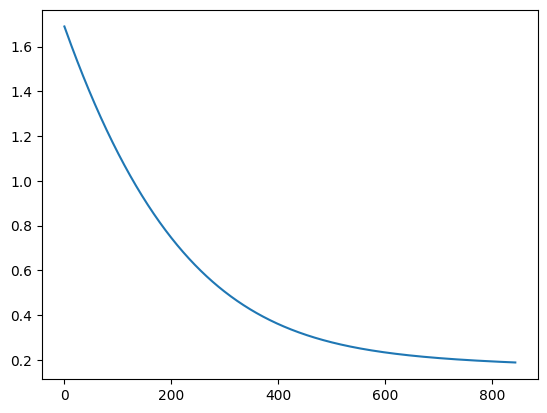

In [96]:
plt.plot(steps, errors)

In [97]:
print(f'Результаты на тестовой: mse - {round(model.MSE(x_scaled_test, y_sc_test), 3)} ,mape -  {round(model.MAPE(x_scaled_test, y_sc_test), 3)}\nРезультаты на тренировочной:mse - {round(model.MSE(x_scaled_train, y_sc_train), 3)} ,mape -  {round(model.MAPE(x_scaled_train, y_sc_train), 3)}')

Результаты на тестовой: mse - 0.15 ,mape -  0.129
Результаты на тренировочной:mse - 0.189 ,mape -  0.12


In [98]:
model = MultipleRegressionAdam(x_standard_train.shape[1])
steps, errors = model.fit(x_standard_train, y_st_train, max_steps = 10000)

Convergence


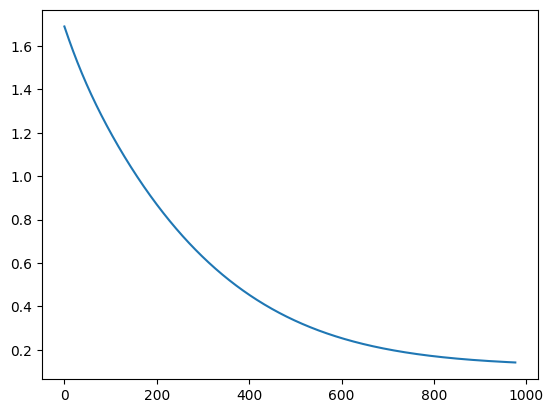

In [99]:
plt.plot(steps, errors)

In [100]:
print(f'Результаты на тестовой: mse - {round(model.MSE(x_standard_test, y_st_test), 3)} ,mape -  {round(model.MAPE(x_standard_test, y_st_test), 3)}\nРезультаты на тренировочной:mse - {round(model.MSE(x_standard_train, y_st_train), 3)} ,mape -  {round(model.MAPE(x_standard_train, y_st_train), 3)}')

Результаты на тестовой: mse - 0.107 ,mape -  0.143
Результаты на тренировочной:mse - 0.142 ,mape -  0.125


## С использованием Adam + L2 регуляризация

In [112]:
class MultipleRegressionAdamL2():

    def __init__(self, in_features):
        self.a1 = np.zeros((in_features, 1))
        self.beta1 = 0.8
        self.beta2 = 0.999
        self.s = np.zeros((in_features, 1))
        self.v = np.zeros((in_features, 1))

    def predict(self, x):
        return np.array(x @ self.a1)

    def grad(self, x, y):
      #return np.array(2*(self.predict(x) - y) / y.shape[0])
      return np.array(2*x.T @ (x @ self.a1 - y) / len(y))

    def MSE(self, x, y):
        return ((y - self.predict(x))**2).mean().item()

    def MAE(self, x, y):
        return abs(y - self.predict(x)).mean()

    def MAPE(self, x, y):
        return abs((y - self.predict(x)) / y).mean()

    def fit(self, x, Y, alpha = 0.001, epsylon = 1e-8, max_steps = 5000, tolerance = 1e-4, l2_ratio=1e-3):
        steps, errors = [], []
        step = 0
        prev_error = np.inf
        for _ in range(max_steps):
            grad = self.grad(x, Y)
            self.s = self.beta1*self.s + (1 - self.beta1)*grad
            self.v = self.beta2*self.v + (1 - self.beta2)*(grad**2)
            s_hat = self.s / (1 - self.beta1**(_ + 1))
            v_hat = self.v / (1 - self.beta2**(_ + 1))
            #self.a1 -= alpha*s_hat / np.sqrt(v_hat + epsylon)
            new_error = self.MSE(x, Y)
            l2 = l2_ratio * np.sum(self.a1**2)
            new_error += l2
            self.a1 -= alpha* (s_hat / np.sqrt(v_hat + epsylon) + l2_ratio*self.a1)
            errors.append(new_error)
            steps.append(step)
            step += 1
            if abs(prev_error - new_error) < tolerance:
                print('Convergence')
                break
            prev_error  = new_error
        return steps, errors

In [113]:
model = MultipleRegressionAdamL2(x_scaled_train.shape[1])
steps, errors = model.fit(x_scaled_train, y_sc_train, max_steps = 10000)

Convergence


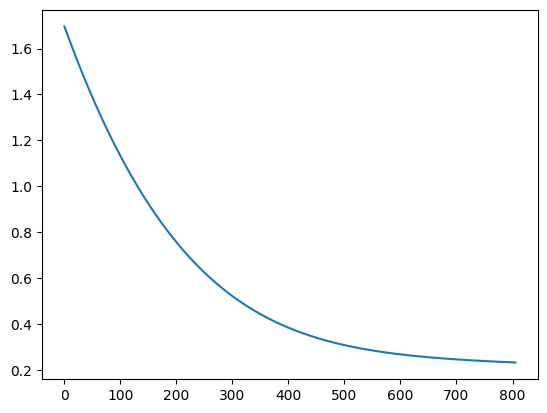

In [114]:
plt.plot(steps, errors)

In [115]:
print(f'Результаты на тестовой: mse - {round(model.MSE(x_scaled_test, y_sc_test), 3)} ,mape -  {round(model.MAPE(x_scaled_test, y_sc_test), 3)}\nРезультаты на тренировочной:mse - {round(model.MSE(x_scaled_train, y_sc_train), 3)} ,mape -  {round(model.MAPE(x_scaled_train, y_sc_train), 3)}')

Результаты на тестовой: mse - 0.153 ,mape -  0.127
Результаты на тренировочной:mse - 0.193 ,mape -  0.118


In [116]:
model = MultipleRegressionAdamL2(x_standard_train.shape[1])
steps, errors = model.fit(x_standard_train, y_st_train, max_steps = 10000)

Convergence


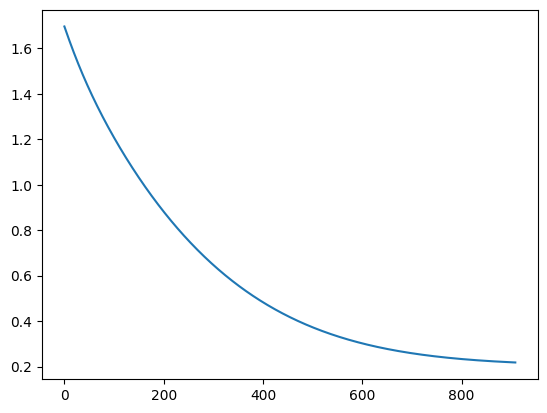

In [117]:
plt.plot(steps, errors)

In [118]:
print(f'Результаты на тестовой: mse - {round(model.MSE(x_standard_test, y_st_test), 3)} ,mape -  {round(model.MAPE(x_standard_test, y_st_test), 3)}\nРезультаты на тренировочной:mse - {round(model.MSE(x_standard_train, y_st_train), 3)} ,mape -  {round(model.MAPE(x_standard_train, y_st_train), 3)}')

Результаты на тестовой: mse - 0.114 ,mape -  0.152
Результаты на тренировочной:mse - 0.15 ,mape -  0.136
